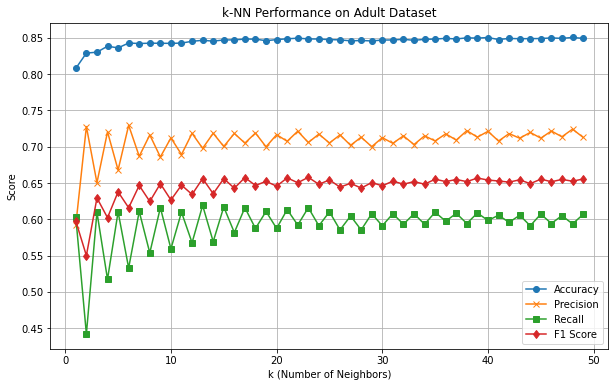

Best k based on F1 score: 23
Best k: 23
Precision: 0.7057
Recall: 0.6160
F1 Score: 0.6578


In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt


columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=columns)

# missing values are represented as ?
df = df.replace('?', np.nan)
df = df.dropna()

#turn categorical variables into numerical values
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# standardize
scaler = StandardScaler()
df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

# Encode the target variable (income)
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])  # '>50K' becomes 1, '<=50K' becomes 0

#features (X) and target (y)
X = df.drop('income', axis=1).values
y = df['income'].values

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#store results
k_values = list(range(1, 50))  # k from 1 to 50
accuracies = []
precision_list = []
recall_list = []
f1_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    accuracies.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

#plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, precision_list, marker='x', label='Precision')
plt.plot(k_values, recall_list, marker='s', label='Recall')
plt.plot(k_values, f1_list, marker='d', label='F1 Score')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('k-NN Performance on Adult Dataset')
plt.legend()
plt.grid()
plt.show()

#best k based on F1
best_k = k_values[np.argmax(f1_list)]
print(f"Best k based on F1 score: {best_k}")

#best k-NN model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

#report for the best k
precision_best, recall_best, f1_best, _ = precision_recall_fscore_support(y_test, y_pred_best, average='binary')
print(f"Best k: {best_k}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")


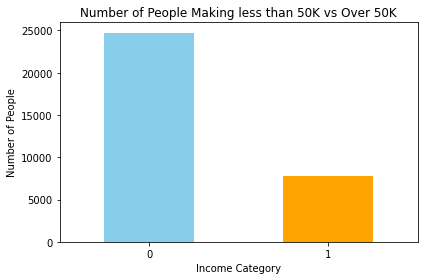

In [25]:
 # '>50K' becomes 1, '<=50K' becomes 0
income_counts = df['income'].value_counts()
plt.figure(figsize=(6, 4))
income_counts.plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Number of People Making less than 50K vs Over 50K' )
plt.xlabel('Income Category')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
# Monte Carlo cross-validation
num_iterations = 10
test_size = 0.25  # 25% test size
k_values = list(range(1, 51))
results = {k: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for k in k_values}

for _ in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        
        results[k]['accuracy'].append(acc)
        results[k]['precision'].append(precision)
        results[k]['recall'].append(recall)
        results[k]['f1'].append(f1)

#averages
avg_results = {k: {metric: np.mean(results[k][metric]) for metric in results[k]} for k in k_values}

# Print average results
for k in k_values:
    print(f"k: {k}, Average Accuracy: {avg_results[k]['accuracy']:.4f}, Average Precision: {avg_results[k]['precision']:.4f}, "
          f"Average Recall: {avg_results[k]['recall']:.4f}, Average F1 Score: {avg_results[k]['f1']:.4f}")